# Pylops - LSQR

### Author: M.Ravasi

In this notebook I compare scipy and pylops LSQR

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from scipy.sparse.linalg import lsqr as sp_lsqr
from pylops.basicoperators import *
from pylops.optimization.basic import lsqr, cgls

## LSQR with zero initial guess

 
LSQR            Least-squares solution of  Ax = b
The matrix A has 50 rows and 50 columns
damp = 1.00000000000000e-10   calc_var =        0
atol = 1.00e-10                 conlim = 1.00e+12
btol = 1.00e-10               iter_lim =       50
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   5.361e+01  5.361e+01    1.0e+00  1.8e-01
     1  2.91288e-01   2.287e+01  2.287e+01    4.3e-01  7.7e-01   1.0e+01  1.0e+00
     2  4.53767e-01   1.075e+01  1.075e+01    2.0e-01  4.9e-01   1.4e+01  2.2e+00
     3  2.11292e-01   5.851e+00  5.851e+00    1.1e-01  3.6e-01   1.7e+01  3.4e+00
     4  1.58158e-01   3.928e+00  3.928e+00    7.3e-02  2.6e-01   1.9e+01  4.7e+00
     5  1.85204e-01   3.136e+00  3.136e+00    5.8e-02  2.0e-01   2.2e+01  6.0e+00
     6  1.75748e-01   2.697e+00  2.697e+00    5.0e-02  1.3e-01   2.4e+01  7.6e+00
     7  2.02568e-01   2.376e+00  2.376e+00    4.4e-02  1.4e-01   2.5e+01  9.5e+00
     8  2.08146e-01   2.159e+00  2.159

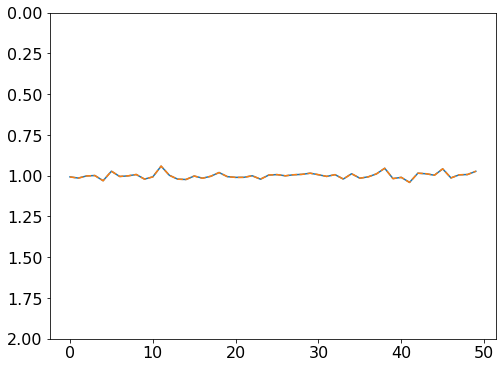

In [2]:
par = {'n': 50, 'm': 50, 'k': 14,
        'dtype': np.float64, 'sparse': False} # square

# Create random m-by-n encoding matrix
m = par['m']
n = par['n']
A = np.random.normal(0, 1, (m, n))
Aop = MatrixMult(A)
x = np.ones(n)
y = A.dot(x)

damp = 1e-10
atol = 1e-10
btol = 1e-10
conlim = 1e12
itn_max = 50
show = True

# Without initial guess
xinv_sp, istop_sp, itn_sp, r1norm_sp, r2norm_sp, anorm_sp, \
acond_sp, arnorm_sp, xnorm_sp, var_sp = \
    sp_lsqr(Aop, y, damp, atol, btol, conlim, itn_max, show)

xinv, istop, itn, r1norm, r2norm, anorm, acond, arnorm, xnorm, var, cost = \
    lsqr(Aop, y, np.zeros(n), damp, atol, btol, conlim, itn_max, True, show)

plt.figure()
plt.plot(xinv)
plt.plot(xinv_sp, '--')
plt.ylim(2, 0);

## LSQR with non-zero initial guess

 
LSQR            Least-squares solution of  Ax = b
The matrix A has 50 rows and 50 columns
damp = 1.00000000000000e-10   calc_var =        0
atol = 1.00e-10                 conlim = 1.00e+12
btol = 1.00e-10               iter_lim =      100
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  7.56525e-01   6.706e+01  6.706e+01    1.0e+00  1.3e-01
     1 -2.83925e-01   3.394e+01  3.394e+01    7.4e-01  7.5e-01   1.0e+01  1.0e+00
     2  1.31644e-01   1.827e+01  1.827e+01    4.0e-01  4.2e-01   1.5e+01  2.2e+00
     3  3.19834e-01   1.249e+01  1.249e+01    2.7e-01  3.4e-01   1.7e+01  3.5e+00
     4  4.62589e-01   8.861e+00  8.861e+00    1.9e-01  2.4e-01   2.0e+01  5.0e+00
     5  6.71276e-01   6.753e+00  6.753e+00    1.5e-01  1.9e-01   2.2e+01  6.5e+00
     6  7.00696e-01   5.333e+00  5.333e+00    1.2e-01  2.0e-01   2.4e+01  8.3e+00
     7  6.87875e-01   4.221e+00  4.221e+00    9.2e-02  1.4e-01   2.6e+01  1.0e+01
     8  7.90627e-01   3.629e+00  3.629

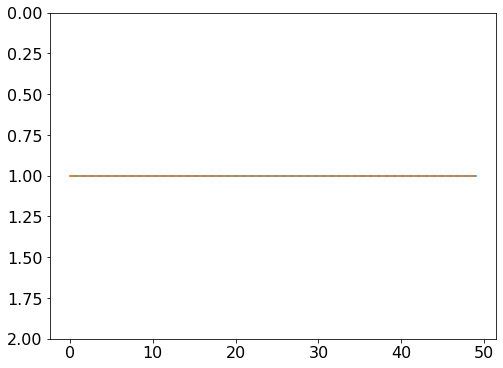

In [3]:
par = {'n': 50, 'm': 50, 'k': 14,
        'dtype': np.float64, 'sparse': False} # square

# Create random m-by-n encoding matrix
m = par['m']
n = par['n']
A = np.random.normal(0, 1, (m, n))
Aop = MatrixMult(A)
x = np.ones(n)
y = A.dot(x)

damp = 1e-10
atol = 1e-10
btol = 1e-10
conlim = 1e12
itn_max = 100
show = True

x0 = np.random.normal(0, 1, n)

# With initial guess
xinv_sp, istop_sp, itn_sp, r1norm_sp, r2norm_sp, anorm_sp, \
acond_sp, arnorm_sp, xnorm_sp, var_sp = \
sp_lsqr(Aop, y, damp, atol, btol, conlim, itn_max, show, x0=x0)
#    sp_lsqr(Aop, y - Aop * x0, damp, atol, btol, conlim, itn_max, show)
#xinv_sp += x0
xinv, istop, itn, r1norm, r2norm, anorm, acond, arnorm, xnorm, var, cost = \
    lsqr(Aop, y, x0, damp, atol, btol, conlim, itn_max, True, show)

plt.figure()
plt.plot(xinv)
plt.plot(xinv_sp, '--')
plt.ylim(2, 0);